In [6]:
%load_ext autoreload
%autoreload 2
from .graph_utils.py import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named '__main__.graph_utils'; '__main__' is not a package

In [19]:
G = generate_square_multidi_graph(10,10, mean_distance=400, std=100)

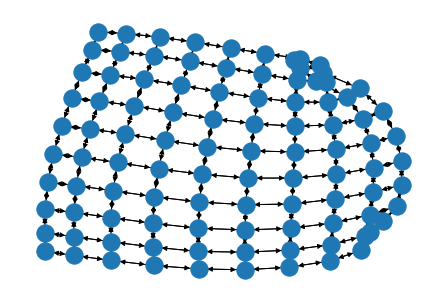

In [20]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.draw()

In [4]:
g = dgl.DGLGraph()

In [5]:
g = dgl.DGLGraph()
g.from_networkx(G, edge_attrs=['length', 'u', 'v'])

In [6]:
g.number_of_nodes()

100

In [7]:
g_line = g.line_graph(shared=True)

In [8]:
print(g_line.number_of_edges())

1328


In [9]:
from main import *
from call_generator import RandomCallGenerator
from driver_initializer import *
import time
# driver_initializer = RandomDriverInitializer()
# call_generator = RandomCallGenerator(coeff=1, wait_mean=5, duration_mean=12)
# city = City(g_line, call_generator, driver_initializer)
# dqn_agent_gcn = DQNAgent(city, model_type='gcn', policy_pow=1.5)
# dqn_agent_gat = DQNAgent(city, model_type='gat', policy_pow=1.5)
TEST_EPOCH = 10
TRAIN_EPOCH = 20
TEST_TIME_STEPS = 100
TRAIN_TIME_STEPS = 100

In [ ]:
for _ in range(5):
    test_calls = [0.6]
    policy_pows = [1000.0, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0]
    policy_pows.reverse()
    save_folder = 'hyper_param_tests'
    started_time_date = time.strftime("%Y%m%d_%H%M%S")
    f = open("hyper_param_tests/total_results_with_speed_%s.txt" % started_time_date, 'w')
    f.write('call_percentage\tname\tmean\tstd\n')
    f.flush()

    def eval_and_write(agent, call):
        m, s = evaluate(city, agent, epochs = TEST_EPOCH, time_steps=TEST_TIME_STEPS, export_result=False)
        f.write('%.2f\t%s\t%.4f\t%.4f\n' % (call, agent.name, m, s))
        f.flush()

    for c in test_calls:
        driver_initializer = RandomDriverInitializer(driver_n =  [0, 1], driver_p = [0.2, 0.8])
        call_generator = RandomCallGenerator(coeff=c, wait_mean=5, duration_mean=12)
        city = City(g_line, call_generator, driver_initializer, consider_speed=True, after_action_random=False)
        eval_and_write(RandomAgent(), c)
        
        for policy_pow in policy_pows:
            eval_and_write(ProportionalAgent(city, proportional='order', policy_pow=policy_pow,strategy=0 if policy_pow > 500 else 1), c)
            dqn_agent_gcn = DQNAgent(city, model_type='gcn', policy_pow=policy_pow,strategy=0 if policy_pow > 500 else 1)
            dqn_agent_gat = DQNAgent(city, model_type='gat', policy_pow=policy_pow,strategy=0 if policy_pow > 500 else 1)
            train(city, dqn_agent_gcn, epochs = TRAIN_EPOCH, time_steps=TRAIN_TIME_STEPS)
            with torch.no_grad():
                eval_and_write(dqn_agent_gcn, c)
            train(city, dqn_agent_gat, epochs = TRAIN_EPOCH, time_steps=TRAIN_TIME_STEPS)
            with torch.no_grad():
                eval_and_write(dqn_agent_gat, c)
            

City initialized with total 284 drivers
hit rate so far: 0.8125
hit rate so far: 0.7000
hit rate so far: 0.6957
hit rate so far: 0.7069
hit rate so far: 0.7424
hit rate so far: 0.7703
hit rate so far: 0.7753
hit rate so far: 0.7604
hit rate so far: 0.7568
hit rate so far: 0.7385
hit rate so far: 0.7391
hit rate so far: 0.7097
hit rate so far: 0.7168
hit rate so far: 0.6984
hit rate so far: 0.7079
hit rate so far: 0.7110
hit rate so far: 0.7118
hit rate so far: 0.7113
hit rate so far: 0.7227
hit rate so far: 0.7232
hit rate so far: 0.7173
hit rate so far: 0.7119
hit rate so far: 0.7125
hit rate so far: 0.7077
hit rate so far: 0.7163
hit rate so far: 0.7151
hit rate so far: 0.7206
hit rate so far: 0.7165
hit rate so far: 0.7119
hit rate so far: 0.7096
hit rate so far: 0.7123
hit rate so far: 0.7140
hit rate so far: 0.7137
hit rate so far: 0.7039
hit rate so far: 0.7065
hit rate so far: 0.7113
hit rate so far: 0.7079
hit rate so far: 0.7059
hit rate so far: 0.7013
hit rate so far: 0.7029


hit rate so far: 0.8056
hit rate so far: 0.8067
hit rate so far: 0.8026
hit rate so far: 0.7975
hit rate so far: 0.8000
hit rate so far: 0.7984
hit rate so far: 0.7920
hit rate so far: 0.7896
hit rate so far: 0.7816
hit rate so far: 0.7778
hit rate so far: 0.7776
hit rate so far: 0.7727
hit rate so far: 0.7696
hit rate so far: 0.7717
hit rate so far: 0.7672
hit rate so far: 0.7682
hit rate so far: 0.7640
hit rate so far: 0.7619
hit rate so far: 0.7577
hit rate so far: 0.7559
hit rate so far: 0.7605
hit rate so far: 0.7606
hit rate so far: 0.7572
hit rate so far: 0.7570
hit rate so far: 0.7535
hit rate so far: 0.7528
hit rate so far: 0.7503
hit rate so far: 0.7473
hit rate so far: 0.7494
hit rate so far: 0.7494
hit rate so far: 0.7500
hit rate so far: 0.7508
hit rate so far: 0.7503
hit rate so far: 0.7505
hit rate so far: 0.7468
hit rate so far: 0.7487
hit rate so far: 0.7492
hit rate so far: 0.7500
hit rate so far: 0.7520
hit rate so far: 0.7527
hit rate so far: 0.7522
hit rate so far:

hit rate so far: 0.6265
hit rate so far: 0.6268
hit rate so far: 0.6277
hit rate so far: 0.6296
hit rate so far: 0.6307
hit rate so far: 0.6319
hit rate so far: 0.6325
hit rate so far: 0.6281
hit rate so far: 0.6286
hit rate so far: 0.6279
hit rate so far: 0.6276
hit rate so far: 0.6270
hit rate so far: 0.6278
hit rate so far: 0.6305
hit rate so far: 0.6280
hit rate so far: 0.6296
hit rate so far: 0.6285
hit rate so far: 0.6298
hit rate so far: 0.6291
hit rate so far: 0.6269
hit rate so far: 0.6291
hit rate so far: 0.6290
hit rate so far: 0.6302
hit rate so far: 0.6336
hit rate so far: 0.6328
hit rate so far: 0.6345
hit rate so far: 0.6346
hit rate so far: 0.6328
hit rate so far: 0.6313
hit rate so far: 0.6311
hit rate so far: 0.6311
hit rate so far: 0.6312
hit rate so far: 0.6293
hit rate so far: 0.6291
hit rate so far: 0.6282
hit rate so far: 0.6301
hit rate so far: 0.6276
hit rate so far: 0.6261
hit rate so far: 0.6278
hit rate so far: 0.6241
City initialized with total 285 drivers


hit rate so far: 0.1915
hit rate so far: 0.1910
hit rate so far: 0.1906
hit rate so far: 0.1896
percentage: 0.18956043956043955
City initialized with total 286 drivers
hit rate so far: 0.6250
hit rate so far: 0.5417
hit rate so far: 0.5588
hit rate so far: 0.5435
hit rate so far: 0.5600
hit rate so far: 0.5484
hit rate so far: 0.5263
hit rate so far: 0.5000
hit rate so far: 0.4412
hit rate so far: 0.4237
hit rate so far: 0.3939
hit rate so far: 0.3836
hit rate so far: 0.3789
hit rate so far: 0.3556
hit rate so far: 0.3594
hit rate so far: 0.3512
hit rate so far: 0.3442
hit rate so far: 0.3290
hit rate so far: 0.3102
hit rate so far: 0.3094
hit rate so far: 0.3055
hit rate so far: 0.3003
hit rate so far: 0.3082
hit rate so far: 0.3098
hit rate so far: 0.3149
hit rate so far: 0.3116
hit rate so far: 0.3022
hit rate so far: 0.3008
hit rate so far: 0.2992
hit rate so far: 0.2946
hit rate so far: 0.2892
hit rate so far: 0.2811
hit rate so far: 0.2785
hit rate so far: 0.2778
hit rate so far: